In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Sleep_Efficiency.csv',index_col='Bedtime' ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (388, 14)


,ID,Age,Gender,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
Bedtime,,,,,,,,,,,,,,
2021-03-06 01:00:00,1,65,Female,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2021-12-05 02:00:00,2,69,Male,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2021-05-25 21:30:00,3,40,Female,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
2021-11-03 02:30:00,4,40,Female,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
2021-03-13 01:00:00,5,57,Male,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 23:00:00,446,30,Female,2021-11-16 06:30:00,7.5,0.53,28,20,52,4.0,50.0,2.0,Yes,1.0
2021-11-13 22:00:00,448,27,Female,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
2021-03-31 21:00:00,449,52,Male,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0


<Axes: xlabel='Bedtime'>

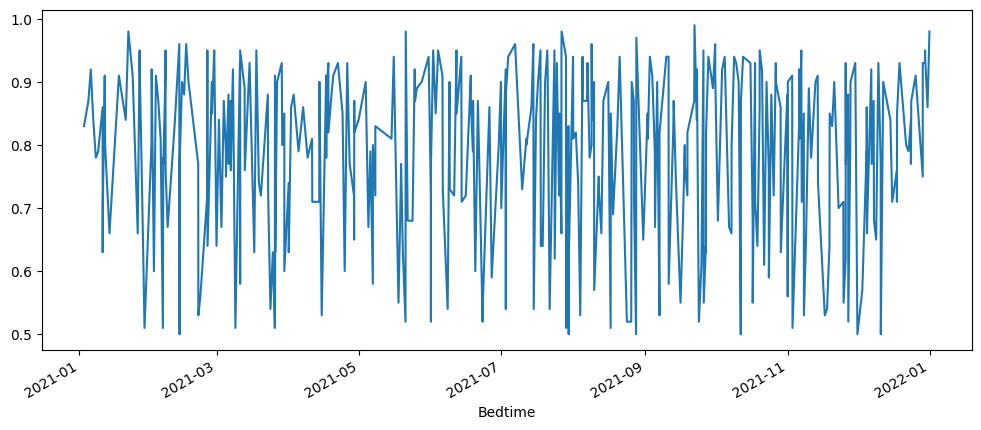

In [ ]:
df['Sleep efficiency'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Sleep efficiency'])

1. ADF :  -12.816564788490636
2. P-Value :  6.282000661013602e-24
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 386
5. Critical Values :
	 1% :  -3.447405233596701
	 5% :  -2.8690569369014605
	 10% :  -2.5707743450830893


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Sleep efficiency'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-448.491, Time=5.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-445.780, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-447.435, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-446.696, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=930.717, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-450.312, Time=1.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-451.270, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-450.151, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-449.274, Time=0.57 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-448.350, Time=1.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=352.412, Time=0.11 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 9.867 seconds


In [ ]:
from pmdarima import auto_arima

# Fit ARIMA model using auto_arima
stepwise_fit = auto_arima(train['Sleep efficiency'], trace=True, suppress_warnings=True)

# Get the best ARIMA model order parameters
best_order = stepwise_fit.order

print("Best ARIMA model order parameters (p, d, q):", best_order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-414.053, Time=1.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-411.666, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-414.308, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-413.366, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=860.974, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-417.474, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-415.829, Time=0.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-415.845, Time=1.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-415.915, Time=1.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-413.861, Time=2.23 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 8.700 seconds
Best ARIMA model order parameters (p, d, q): (2, 0, 0)


In [ ]:
print(df.shape)
train=df.iloc[:-50]
test=df.iloc[-50:]
print(train.shape,test.shape)

(388, 14)
(338, 14) (50, 14)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Sleep efficiency'], order=best_order)
model = model.fit()
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:       Sleep efficiency   No. Observations:                  338
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 197.930
Date:                Tue, 09 Apr 2024   AIC                           -387.860
Time:                        12:25:14   BIC                           -372.568
Sample:                             0   HQIC                          -381.765
                                - 338                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7915      0.009     87.663      0.000       0.774       0.809
ar.L1         -0.1048      0.054     -1.932      0.053      -0.211       0.002
ar.L2          0.1063      0.054      1.954      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

<Axes: xlabel='Bedtime'>

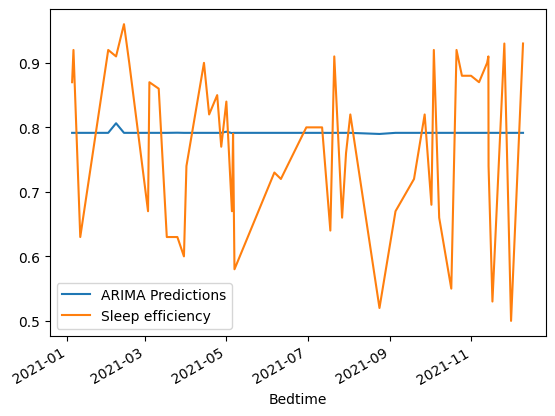

In [ ]:
# Specify start and end points for predictions
start = len(train)  # Start index for predictions
end = len(train) + len(test) - 1  # End index for predictions

# Fit ARIMA model
model = ARIMA(train['Sleep efficiency'], order=best_order)
model = model.fit()

# Generate predictions
pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Set index of predictions to match the dates in the test dataset
pred.index = test.index

pred.plot(legend=True)
test['Sleep efficiency'].plot(legend=True)